# Importações e definições de função

In [5]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
def show_image_in_window(image):
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def print_mono_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Questão 1

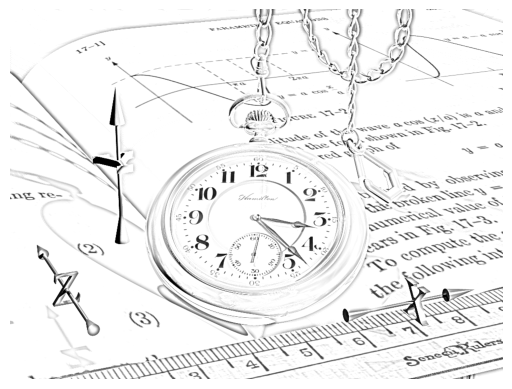

In [6]:
img = cv2.imread('images/watch.png')
# Convert image to gray
# Parameters: Original image, conversion code
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Apply gaussian mask into gray image
# Parameters: Image, Size of blur window, blur intensity horizontally, blur intensity vertically
blur_image = cv2.GaussianBlur(gray_image, (21, 21), sigmaX=0, sigmaY=0) 

# Apply desired visual effect
pencil_image = cv2.divide(gray_image,blur_image, scale=256)
# Se a relação gray/blur >= 1 (blur <= gray, blur mais escuro que o gray)=> pixel resultante =  255, já que a escala multiplicadora vai garantir isso

# Else, blur > gray => gray/blur < 1 => Pixel vai estar proporcionalmente no espectro de 0 a 255
# O blur > gray (Blur mais claro que o cinza) vai acontecer em regiões mais escuras do desenho original
# já que o blur, que vai pegar regiões claras ao lado, vai tender a ser mais claro que a imagem cinza
print_mono_image(pencil_image)


# Questão 2

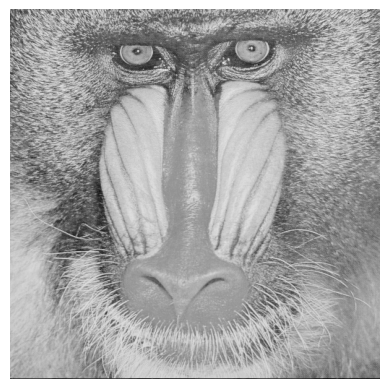

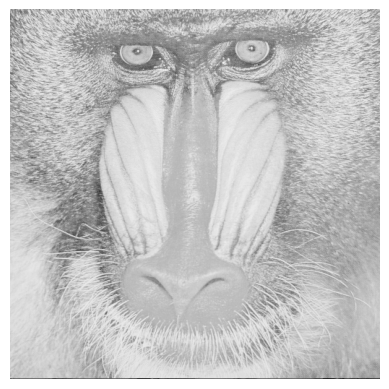

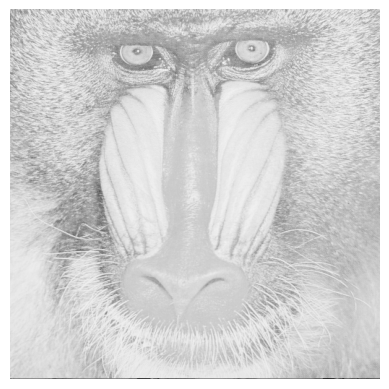

In [7]:
# Load image
image = cv2.imread('images/baboon_monocromatica.png')
gamma = 1.5
gamma = 2.5
gamma = 3.5

gamma_list = [1.5, 2.5, 3.5]
for gamma in gamma_list:
    # Normalized image
    norm_image = image.astype(np.float32) / 255.0
    # Gamma Transformed image
    transformed_image = np.power(norm_image,1.0/gamma)
    # Image with correct pixels spectrum
    corrected_image = (transformed_image * 255).astype(np.uint8)
    print_mono_image(corrected_image)

# Questão 3

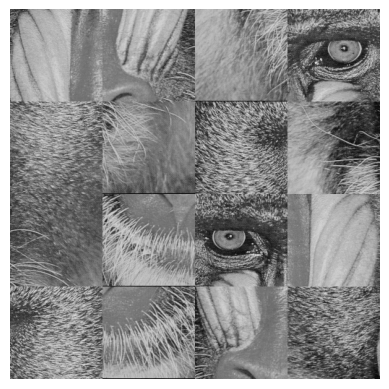

True

In [ ]:
block_size = 4
h = image.shape[0]//block_size
w = image.shape[1]//block_size

def get_pos_from_coords(pos):
    row = (pos - 1) // block_size
    column = (pos - 1) % block_size
    return row, column
# Load image
image = cv2.imread('images/baboon_monocromatica.png')
result_img = np.zeros_like(image)
image_blocks_mapper = {
    1:6, 2:11, 3:13, 4:3, 5:8, 6:16, 7:1, 8:9, 9:12, 10:14, 11:2, 12:7, 13:4, 14:15, 15:10, 16:5
}
coords_mapper = {}

for key, value in image_blocks_mapper.items():
    left_coord = get_pos_from_coords(key)
    right_coord = get_pos_from_coords(value)
    coords_mapper[left_coord] = right_coord

for left_coord, right_coord in coords_mapper.items():
    left_row, left_column = left_coord[0] , left_coord[1] 
    right_row, right_column = right_coord[0] , right_coord[1] 
    result_img[left_row * h: (left_row + 1) * h, left_column * w: (left_column + 1) * w ] = image[right_row * h: (right_row + 1) * h, right_column * w: (right_column + 1) * w ]
print_mono_image(result_img)

# Questão 4

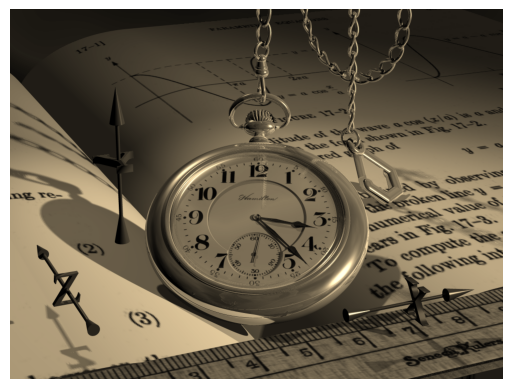

In [9]:
# Load Image
image = cv2.imread('images/watch.png').astype(np.float32)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
"""
[[[pixel (bgr)]linha]matriz], é um vetor (3,) que é diferente de uma matriz 1 x 3
"""
M = np.array([
    [0.393, 0.769, 0.189],  
    [0.349, 0.686, 0.168],  
    [0.272, 0.534, 0.131]]
, dtype=np.float32)
new_image = np.matmul(rgb, M.transpose()) # A transposta é necessária de ser feita porque estamos multiplicando cada canal pela coluna da matriz
new_image = np.clip(new_image, 0, 255).astype(np.uint8)

print_image(new_image)

# Questão 5

## Item A

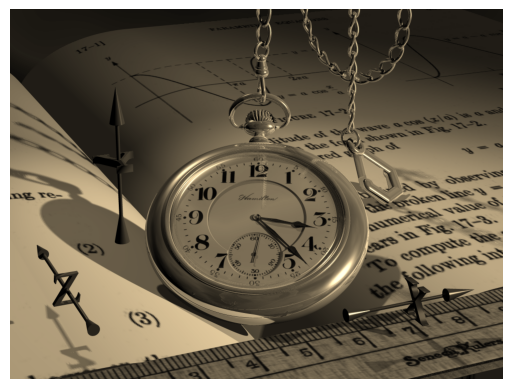

In [10]:
# Essa operação é a mesma que a passada, pois a gente faz a mesma coisa quando multiplica os canais de r, g e b pela transposta
image = cv2.imread('images/watch.png').astype(np.float32)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
"""
[[[pixel (bgr)]linha]matriz], é um vetor (3,) que é diferente de uma matriz 1 x 3
"""
M = np.array([
    [0.393, 0.769, 0.189],  
    [0.349, 0.686, 0.168],  
    [0.272, 0.534, 0.131]]
, dtype=np.float32)
new_image = np.matmul(rgb, M.transpose()) # A transposta é necessária de ser feita porque estamos multiplicando cada canal pela coluna da matriz
new_image = np.clip(new_image, 0, 255).astype(np.uint8)

print_image(new_image)

## Item B

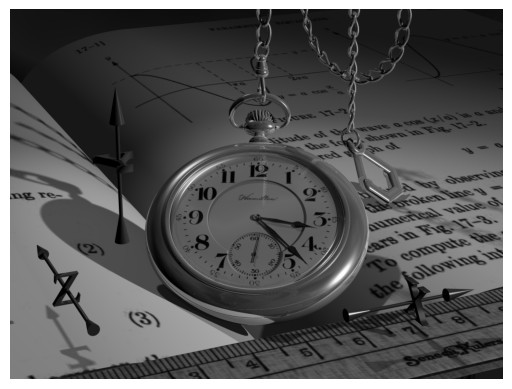

In [11]:
#Load image
brg_image = cv2.imread('images/watch.png').astype(np.float32)
#convert to rgb
rgb_image = cv2.cvtColor(brg_image, cv2.COLOR_BGR2RGB)
#Get convertion matrix
M = np.array([[0.2989,0.5870,0.1140]], dtype=np.float32)

modified_image = np.matmul(rgb_image, M.transpose())

brg_modified_image = cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR)
brg_modified_image = np.clip(brg_modified_image, 0, 255).astype(np.uint8)
print_image(brg_modified_image)

# Questão 6

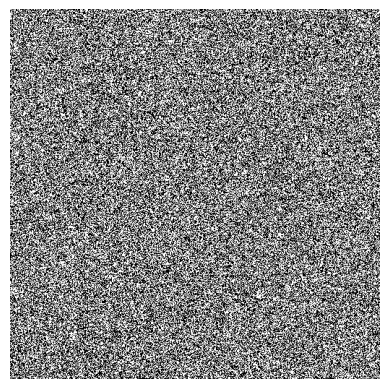

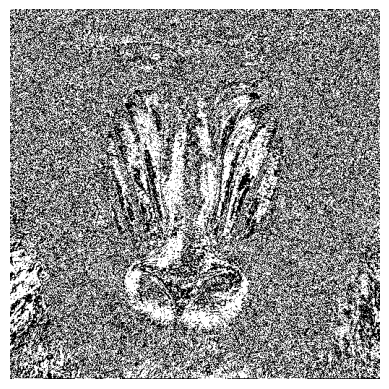

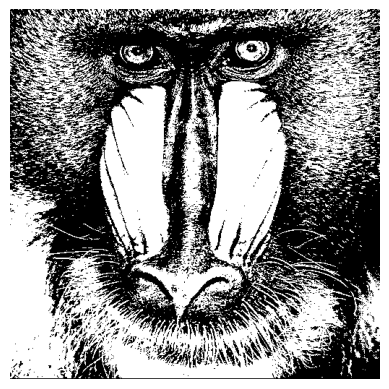

In [12]:
"""
Revisão: 
Operador << arrasta os bits para esquerda, equivalente a elevar a 2 ^ n
x << k == x * 2 ^ k
3 << 6 == 3 * 2 ^ 6
Equivalentemente >> vai arrastar os bits pra direita

Para encontrar o big vamos ter que fazer uma operação de  1 << N sendo N
o N-ésimo bit que gostariamos de isolar

Depois vamos precisar aplicar um & para que a gente consiga zerar todos os bits fora o N-ésimo. 
Depois basta dividir 2 ^ n com a operação >> pois aí teremos um resultado de 0 ou 1 
que vai nos indicar qual foi o coeficiente que estava sendo utilizado naquele bit
"""
image = cv2.imread('images/baboon_monocromatica.png')
def extract_bit(bit_index):
    bit_mask = 1 << bit_index 
    extracted_bits  = np.bitwise_and(image, bit_mask) #Generate a value like 00100000
    normalized_bit_image = extracted_bits  >> bit_index # Convert a value like 00000000 or 00100000 to 0 or 1
    return normalized_bit_image * 255
bit_plan_0 = extract_bit(0)
bit_plan_4 = extract_bit(4)
bit_plan_7 = extract_bit(7)
print_mono_image(bit_plan_0)
print_mono_image(bit_plan_4)
print_mono_image(bit_plan_7)

# Questão 7

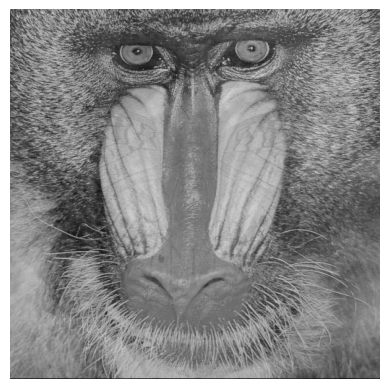

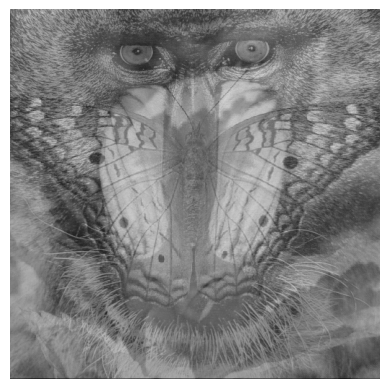

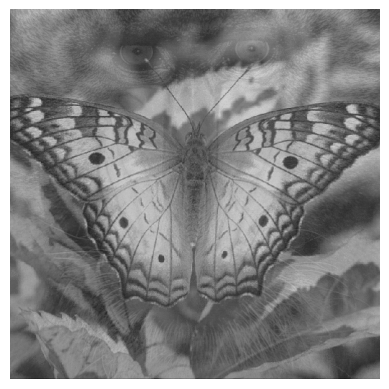

In [13]:
baboon = cv2.imread('images/baboon_monocromatica.png').astype(np.float32)
butterfly = cv2.imread('images/butterfly.png').astype(np.float32)
alfa_values = [0.8, 0.5, 0.2]
for alfa in alfa_values:
    beta = 1 - alfa
    result  = np.add(np.multiply(alfa, baboon), np.multiply(beta, butterfly))
    result = np.clip(result, 0, 255).astype(np.uint8)
    print_mono_image(result)


# Questão 8

## A) Obter negativo

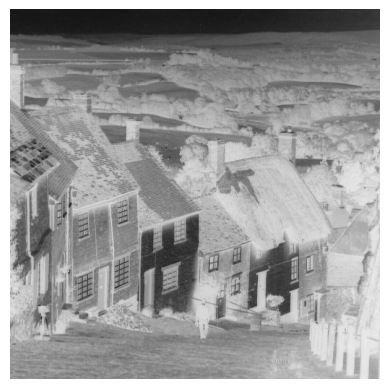

In [14]:
image = cv2.imread('images/city.png')
negative_image = np.negative(image)
print_mono_image(negative_image)

## B) Transformação linear

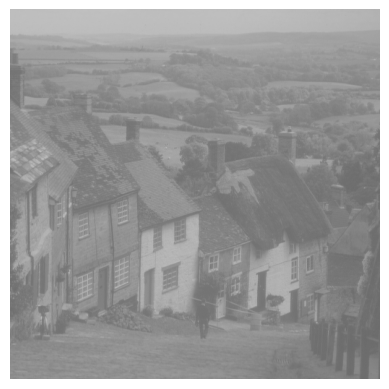

In [15]:
'''
Nossa transformação linear foi
g = (20 * f + 5100) / 51
'''
image = cv2.imread('images/city.png').astype(np.float32)
multiply_term = np.multiply(image, 20)
numerator = np.add(multiply_term, 5100)
transformed_image = np.divide(numerator, 51)
print_mono_image(transformed_image.astype(np.uint8))

## C) Inverter Valores dos pixels das linhas

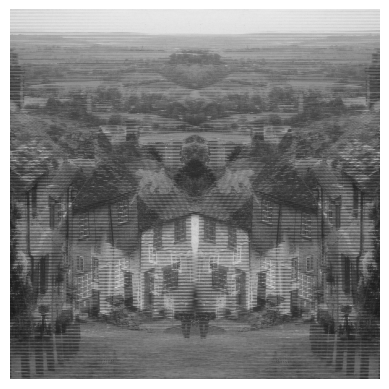

In [16]:
# valor dos pixels pares serão espelhados
img = cv2.imread('images/city.png')
img[::2] = img[::2,::-1] # Linha, coluna
print_mono_image(img)


## D) Espelhar as linhas da metade superior na metade inferior

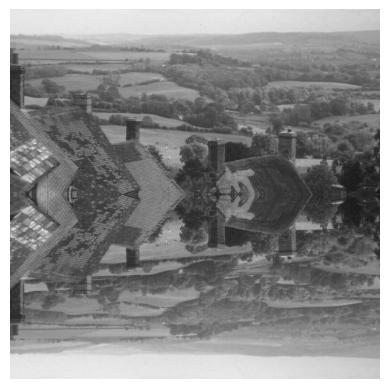

In [17]:
# valor dos pixels pares serão espelhados
img = cv2.imread('images/city.png')
w = img.shape[0]
img[w//2:w] = img[w//2:0:-1] # fatiei da metade até o topo
print_mono_image(img)


## E) Espelhamento vertical

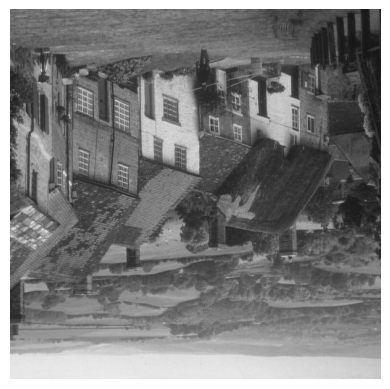

In [18]:
# valor dos pixels pares serão espelhados
img = cv2.imread('images/city.png')
img = img[w:0:-1] # fatiei de baixo até o topo
print_mono_image(img)


# Questão 9

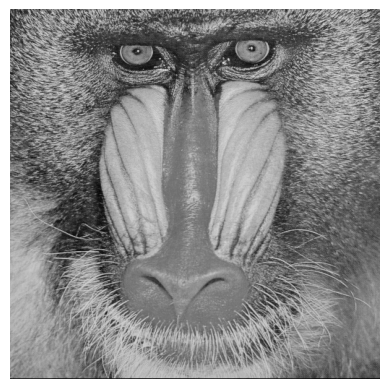

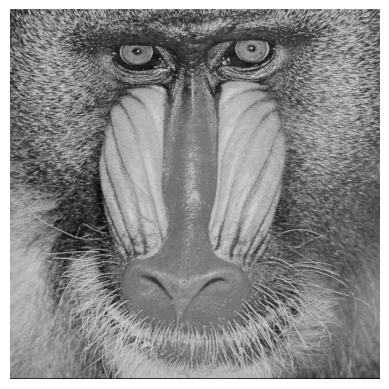

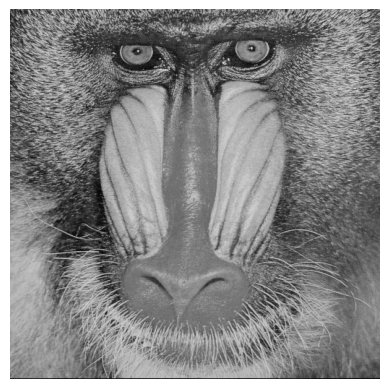

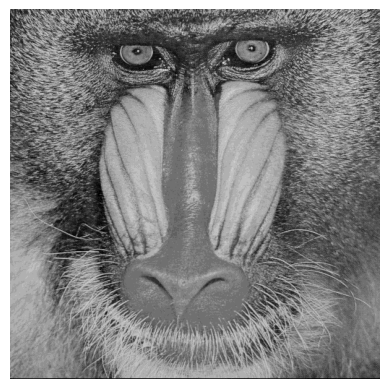

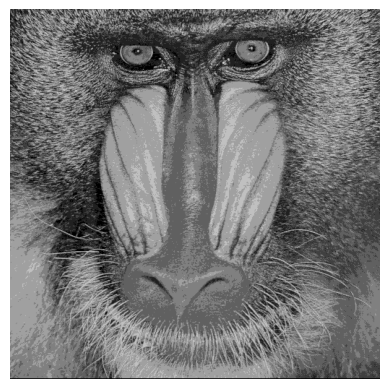

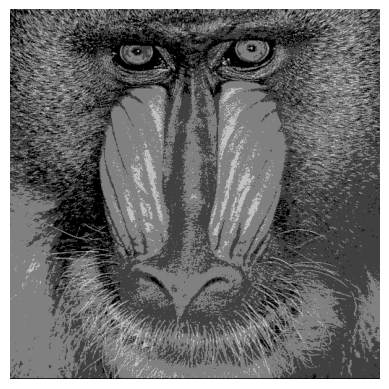

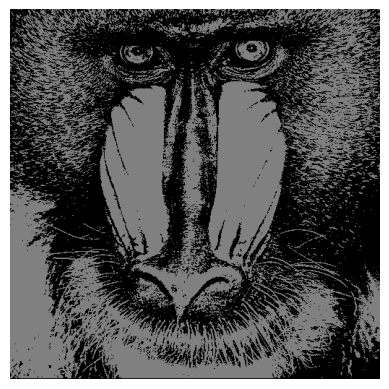

In [19]:
'''
Achar k = n1/n2 
Para cada valor, fazemos v//k
'''
img = cv2.imread('images/baboon_monocromatica.png')
def quantize(img, n):
    k = 256 // n
    return (img // k) * k
for nivel in [256, 64, 32, 16, 8, 4, 2]:
    bit_mask = quantize(img, nivel)
    print_mono_image(bit_mask)

# Questão 10

In [20]:
def apply_filter(kernel, path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    convolved_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)
    clipped_image = np.clip(convolved_image, 0, 255)
    print_mono_image(clipped_image.astype(np.uint8))
    

## H1

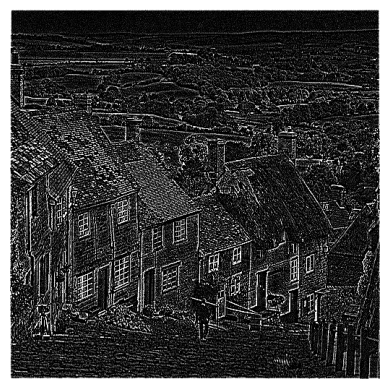

In [21]:
h1 = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0]
])
apply_filter(h1, 'images/city.png')

## H2

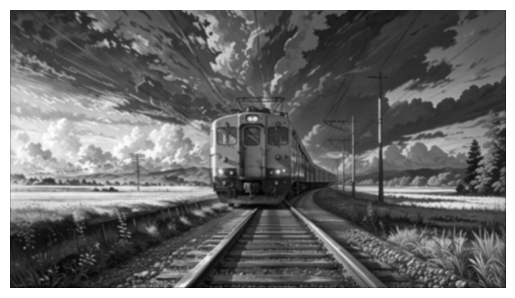

In [22]:
h2 = (1/256) * np.array([
    [ 1,  4,  6,  4, 1],
    [ 4, 16, 24, 16, 4],
    [ 6, 24, 36, 24, 6],
    [ 4, 16, 24, 16, 4],
    [ 1,  4,  6,  4, 1]
])
apply_filter(h2, 'images/train_mono.png')

## H3

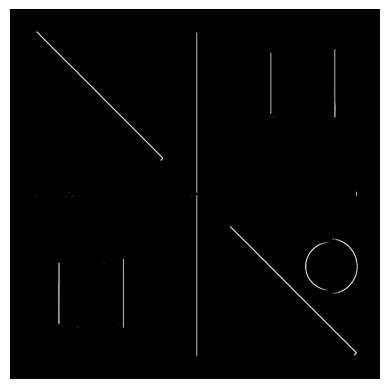

In [23]:
h3 = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])
apply_filter(h3, 'images/deteccao_bordas.png')

## H4

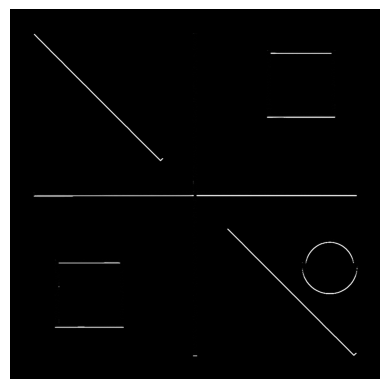

In [24]:
h4 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])
apply_filter(h4, 'images/deteccao_bordas.png')

## H3 e H4 Combinados

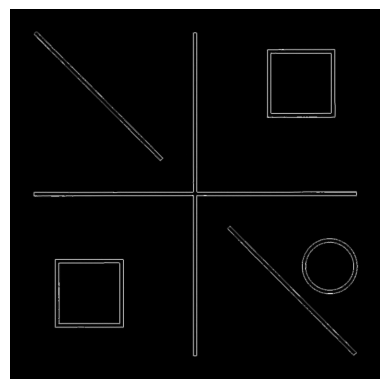

In [25]:
h_comb = np.sqrt(h3**2 + h4**2)
# apply_filter(h_comb, image)
image = cv2.imread('images/deteccao_bordas.png', cv2.IMREAD_GRAYSCALE)
img1 = convolve2d(image, h3, mode='same', boundary='fill', fillvalue=0)
img2 = convolve2d(image, h4, mode='same', boundary='fill', fillvalue=0)
final = np.sqrt(np.power(img2,2)+np.power(img1,2))
print_mono_image(final.astype(np.uint8))

## H5

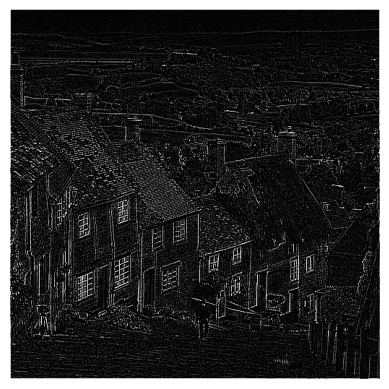

In [26]:
h5 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
apply_filter(h5, 'images/city.png')

## H6

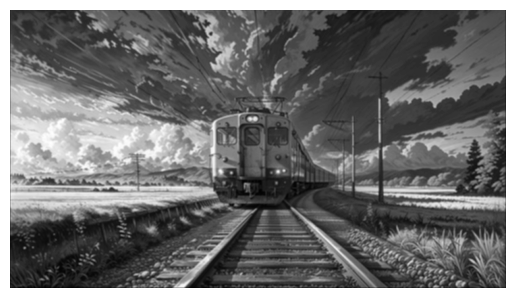

In [27]:
h6 = (1/9) * np.ones((3, 3))
apply_filter(h6, 'images/train_mono.png')

## H7

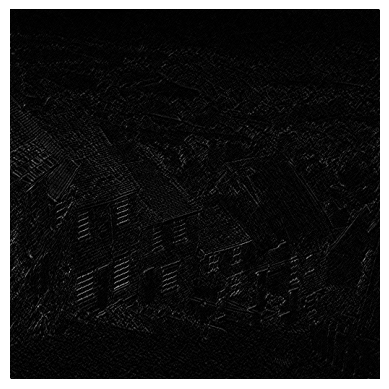

In [28]:
h7 = np.array([
    [-1, -1,  2],
    [-1,  2, -1],
    [ 2, -1, -1]
])
apply_filter(h7, 'images/city.png')

## H8

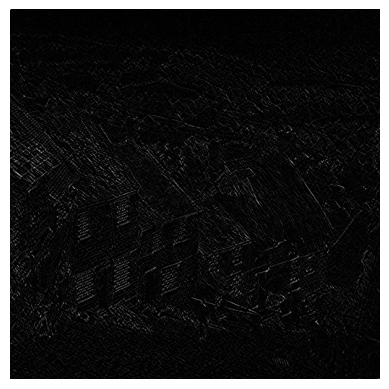

In [29]:
h8 = np.array([
    [ 2, -1, -1],
    [-1,  2, -1],
    [-1, -1,  2]
])
apply_filter(h8, 'images/city.png')

## H9

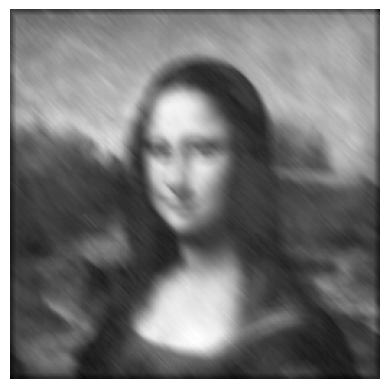

In [30]:
h9 = (1/9) * np.eye(9, dtype=np.float32)
apply_filter(h9, 'images/monalisa.png')

## H10

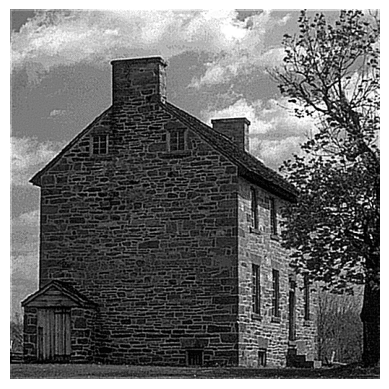

In [31]:
h10 = (1/8) * np.array([
    [-1, -1, -1, -1, -1],
    [-1,  2,  2,  2, -1],
    [-1,  2,  8,  2, -1],
    [-1,  2,  2,  2, -1],
    [-1, -1, -1, -1, -1]
])
apply_filter(h10, 'images/house.png')

## H11

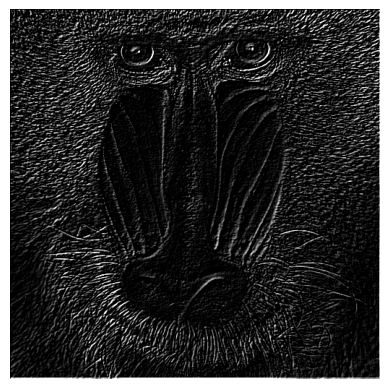

In [32]:
h11 = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
])
apply_filter(h11, 'images/baboon_monocromatica.png')